In [1]:
import api_nyt as nyt
import api_wikipedia as wiki
import manage_articles as mng
import statistics
import datetime
import pickle
import timeseries
import TextPreprocessing as txt
from datetime import date
import graphics
import matplotlib.pyplot as plt
import matching
import time
import word
import random
import numpy

In [2]:
#Load all articles from 2019 and a shuffled copy
articles = mng.load_articles("/Users/markus/Downloads/wikinewsPickle/nyt2019.json")
#articles = mng.shuffle_publicationdates(articles)

#Get a dict of dicts for each calendar week with word frequencies from getWordCounts
wordCounts = mng.getWordCounts(articles)

#List of distinct words 
distinctWords = mng.getDistinctWords(wordCounts)

#List of lists of tuples containing weekly word frequency
countsPerWeek = []
for w in distinctWords:
    countsPerWeek.append((w,mng.getCountPerWeek(wordCounts,w)))   

#Create list of word objects for each keyword
words = []
for c in countsPerWeek:
    words.append(word.Word(c[0],ts_articles=timeseries.Timeseries(c[1])))
#words = sorted(words, key=lambda x: sum(x.ts_articles.getCounts()), reverse=True)
with open("/Users/markus/Downloads/wikinewsPickle/words.txt","wb") as fp:
    pickle.dump(words,fp)

In [2]:
words = []
with open("/Users/markus/Downloads/wikinewsPickle/words.txt","rb") as fp:
    words = pickle.load(fp)

In [3]:
articles = mng.load_articles("/Users/markus/Downloads/wikinewsPickle/nyt2019.json")
articles = mng.shuffle_publicationdates(articles)

interestingWords = mng.filter_interestingness(articles, 10, 5)

In [4]:
#For interesting words
keywords = []
for k in interestingWords:
    keywords.append(k)

#Get matching with wikipedia site
m = matching.groupmatch(keywords, articles, useLocalDict=True)

#For each returned entry from groupmatch, add wikipedia site and wiki timeseries to word object
for key in m.keys():
    #Following line from 
    #https://stackoverflow.com/questions/7125467/find-object-in-list-that-has-attribute-equal-to-some-value-that-meets-any-condi
    try:
        word = next((x for x in words if x.keyword == key), None)
        query = m[key]['query']
        page = m[key]['link'][1]
        wiki_counts = wiki.get_counts(page, word.ts_articles.getStartDate(), word.ts_articles.getEndDate(),"en")
        if wiki_counts is not None:
            #If wikipedia timeseries exists
            word.coocKeywords = query
            word.wikipediaSite = page
            word.ts_wiki = timeseries.parseWikipediaCounts(wiki_counts)
    except:
        print("ERROR: Key is invalid")

Withdrawal_of_U.S._troops_from_Iraq_(2020) 404 Not Found
Derek_Chauvin 404 Not Found
COVID-19_lockdown_in_India 404 Not Found
Trump_v._New_York 404 Not Found
Alleged_assault_of_Jussie_Smollett 404 Not Found


In [3]:
top_amount = 150
#Get top_amount of keywords from words, same for shuffled and non-shuffled
keywords = []
for i in range(top_amount):
    keywords.append(words[i].keyword)

#Get matching with wikipedia site
m = matching.groupmatch(keywords, articles, useLocalDict=True)

#For each returned entry from groupmatch, add wikipedia site and wiki timeseries to word object
for key in m.keys():
    #Following line from 
    #https://stackoverflow.com/questions/7125467/find-object-in-list-that-has-attribute-equal-to-some-value-that-meets-any-condi
    try:
        word = next((x for x in words if x.keyword == key), None)
        query = m[key]['query']
        page = m[key]['link'][1]
        wiki_counts = wiki.get_counts(page, word.ts_articles.getStartDate(), word.ts_articles.getEndDate(),"en")
        if wiki_counts is not None:
            #If wikipedia timeseries exists
            word.coocKeywords = query
            word.wikipediaSite = page
            word.ts_wiki = timeseries.parseWikipediaCounts(wiki_counts)
    except:
        print("ERROR: Key is invalid")

IndexError: list index out of range

In [5]:
#Get list of all words with matched wikipedia site
words_analyze = [x for x in words if x.wikipediaSite != ""]

corr = []

#Drop all timepoints which are not contained in both article and wikipedia timeseries
for w in words_analyze:
    ts_a, ts_w = timeseries.alignTimeseries(w.ts_articles,w.ts_wiki)
    if len(ts_w.getCounts())<2 or len(ts_a.getCounts())<2:
        words_analyze.remove(w)
    else:
        corr.append(statistics.getCorrelation(ts_a.getCounts(),ts_w.getCounts()))

In [6]:
import numpy
print("correlation")
print(numpy.mean(corr))
#Unshuffled correlation: 0.23888755133786915

#Shuffled 150: 0.24
#Shuffled 150: 0.288 
#Shuffled 1000: 0.26
#Shuffled 2000 not sorted:

#Interesting 201: 0.24556
#Interesting 201 Shuffled:
#0.233
#0.238
#0.2274
#0.2155
#0.22194
#0.2275
#0.2194
#0.2224
#0.2408


correlation
0.24088996202817786


In [1]:
import api_nyt as nyt
import api_wikipedia as wiki
import manage_articles as mng
import statistics
import datetime
import pickle
import timeseries
import TextPreprocessing as txt
from datetime import date
import graphics
import matplotlib.pyplot as plt
import matching
import time
import word as wordlib
import random
import numpy

In [3]:
words = []
with open("/Users/markus/Downloads/wikinewsPickle/words.txt","rb") as fp:
    words = pickle.load(fp)
print("1")
articles = mng.load_articles("/Users/markus/Downloads/wikinewsPickle/nyt2019.json")
interestingWords = mng.filter_interestingness(articles, 10, 5)
print("2")
#For interesting words
keywords = []
for k in interestingWords:
    keywords.append(k)
print("3")
#Get matching with wikipedia site
m = matching.groupmatch(keywords, articles)
print("4")
#For each returned entry from groupmatch, add wikipedia site and wiki timeseries to word object
for key in m.keys():
    #Following line from 
    #https://stackoverflow.com/questions/7125467/find-object-in-list-that-has-attribute-equal-to-some-value-that-meets-any-condi
    try:
        word = next((x for x in words if x.keyword == key), None)
        query = m[key]['query']
        page = m[key]['link'][1]
        wiki_counts = wiki.get_counts(page, word.ts_articles.getStartDate(), word.ts_articles.getEndDate(),"en")
        if wiki_counts is not None:
            #If wikipedia timeseries exists
            word.coocKeywords = query
            word.wikipediaSite = page
            word.ts_wiki = timeseries.parseWikipediaCounts(wiki_counts)
    except:
        print("ERROR: Key is invalid")


words_analyze = [x for x in words if x.wikipediaSite != ""]

corr = []
#Drop all timepoints which are not contained in both article and wikipedia timeseries
for w in words_analyze:
    ts_a, ts_w = timeseries.alignTimeseries(w.ts_articles,w.ts_wiki)
    if len(ts_w.getCounts())<2 or len(ts_a.getCounts())<2:
        words_analyze.remove(w)
    else:
        corr.append(statistics.getCorrelation(ts_a.getCounts(),ts_w.getCounts()))
print("correlation unshuffled")
print(numpy.mean(corr))

1
2
3
4
List_of_iOS_and_iPadOS_devices 404 Not Found
Alleged_assault_of_Jussie_Smollett 404 Not Found
Undisputed_championship_(boxing) 404 Not Found
List_of_post-2016_election_Donald_Trump_rallies 404 Not Found
Attempts_to_overturn_the_2020_United_States_presidential_election 404 Not Found
Withdrawal_of_U.S._troops_from_Iraq_(2020) 404 Not Found
2019_Whakaari_/_White_Island_eruption 404 Not Found
Turkish_involvement_in_the_Syrian_civil_war 404 Not Found
2020–21_NFL_playoffs 404 Not Found
Doug_Emhoff 404 Not Found
Are_You_My_Mother? 404 Not Found
Miles_Taylor_(security_expert) 404 Not Found
2020_Nashville_bombing 404 Not Found
Alleged_assault_of_Jussie_Smollett 404 Not Found
COVID-19_lockdown_in_India 404 Not Found
Trump_v._New_York 404 Not Found
2020_French_Open_–_Men's_Singles 404 Not Found
List_of_Republicans_who_opposed_the_Donald_Trump_2020_presidential_campaign 404 Not Found
Obama–Trump_voters 404 Not Found
correlation unshuffled
0.29681320296666003


In [2]:
words_analyze = []
with open("/Users/markus/Downloads/wikinewsPickle/words_analyze.txt","rb") as fp:
    words_analyze = pickle.load(fp)

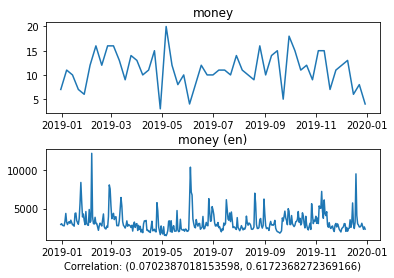

<Figure size 432x288 with 0 Axes>

In [3]:
for w in words_analyze:
    graphics.createPDFwithBothPlots(w)

#if not(len(w.ts_wiki.getCounts())<2 or len(w.ts_articles.getCounts())<2):
#    print(statistics.getCorrelation(ts_a.getCounts(),ts_w.getCounts()))

In [7]:
print("correlation shuffled")
for i in range(10):
    articles_shuffled = mng.shuffle_publicationdates(articles)
    wordCounts = mng.getWordCounts(articles_shuffled)
    #List of distinct words 
    distinctWords = mng.getDistinctWords(wordCounts)
    #List of lists of tuples containing weekly word frequency
    countsPerWeek = []
    for w in distinctWords:
        countsPerWeek.append((w,mng.getCountPerWeek(wordCounts,w)))   
    #Create list of word objects for each keyword
    words = []
    for c in countsPerWeek:
        words.append(wordlib.Word(c[0],ts_articles=timeseries.Timeseries(c[1])))


    for key in m.keys():
    #Following line from 
    #https://stackoverflow.com/questions/7125467/find-object-in-list-that-has-attribute-equal-to-some-value-that-meets-any-condi
        try:
            word = next((x for x in words if x.keyword == key), None)
            query = m[key]['query']
            page = m[key]['link'][1]
            wiki_counts = wiki.get_counts(page, word.ts_articles.getStartDate(), word.ts_articles.getEndDate(),"en")
            if wiki_counts is not None:
                #If wikipedia timeseries exists
                word.coocKeywords = query
                word.wikipediaSite = page
                word.ts_wiki = timeseries.parseWikipediaCounts(wiki_counts)
        except:
            print("ERROR: Key is invalid")
    
    words_analyze = [x for x in words if x.wikipediaSite != ""]

    corr = []
    #Drop all timepoints which are not contained in both article and wikipedia timeseries
    for w in words_analyze:
        ts_a, ts_w = timeseries.alignTimeseries(w.ts_articles,w.ts_wiki)
        if len(ts_w.getCounts())<2 or len(ts_a.getCounts())<2:
            words_analyze.remove(w)
        else:
            corr.append(statistics.getCorrelation(ts_a.getCounts(),ts_w.getCounts()))
    print(numpy.mean(corr))

correlation shuffled
List_of_iOS_and_iPadOS_devices 404 Not Found
MacKenzie_Scott 404 Not Found
Alleged_assault_of_Jussie_Smollett 404 Not Found
Alleged_assault_of_Jussie_Smollett 404 Not Found
Undisputed_championship_(boxing) 404 Not Found
List_of_post-2016_election_Donald_Trump_rallies 404 Not Found
Attempts_to_overturn_the_2020_United_States_presidential_election 404 Not Found
Withdrawal_of_U.S._troops_from_Iraq_(2020) 404 Not Found
2019_Whakaari_/_White_Island_eruption 404 Not Found
Turkish_involvement_in_the_Syrian_civil_war 404 Not Found
2020–21_NFL_playoffs 404 Not Found
Cabinet_of_Joe_Biden 404 Not Found
Cabinet_of_Joe_Biden 404 Not Found
Alleged_assault_of_Jussie_Smollett 404 Not Found
COVID-19_lockdown_in_India 404 Not Found
Trump_v._New_York 404 Not Found
2020_French_Open_–_Men's_Singles 404 Not Found
Obama–Trump_voters 404 Not Found
0.2751385239754085
List_of_iOS_and_iPadOS_devices 404 Not Found
MacKenzie_Scott 404 Not Found
Alleged_assault_of_Jussie_Smollett 404 Not Found
